# ***HW#2: AREN 5030: Data Science***

* Instructor: Professor Gregor Henze
* Teaching Assistant: Tim Diller
* Student: Abdulrahman Alwayel
---

## ***Question 5.14***

# **Pr 5.14**: *Determining energy savings from monitoring and verification (M&V) projects*

A crucial element in any energy conservation program is the
ability to verify savings from measured energy use data—this
is referred to as monitoring and verification (M&V). Energy
service companies (ESCOs) are required to perform this as
part of their services. Figure 5.38 depicts how energy savings
are estimated. A common M&V protocol involves measuring the monthly total energy use at the facility for the whole year
before the retrofit (this is the baseline period or the “preretrofit period”) and a whole year after the retrofit (called
the “post-retrofit period”). The time taken for implementing
the energy-saving measures (called the “construction
period”) is neglected in this simple example. One first
identifies a baseline regression model of energy use against
ambient dry-bulb temperature To during the pre-retrofit
period Epre = f(To). This model is then used to predict energy
use during each month of the post-retrofit period by using the
corresponding ambient temperature values. The difference
between model predicted and measured monthly energy use
is the energy savings during that month.

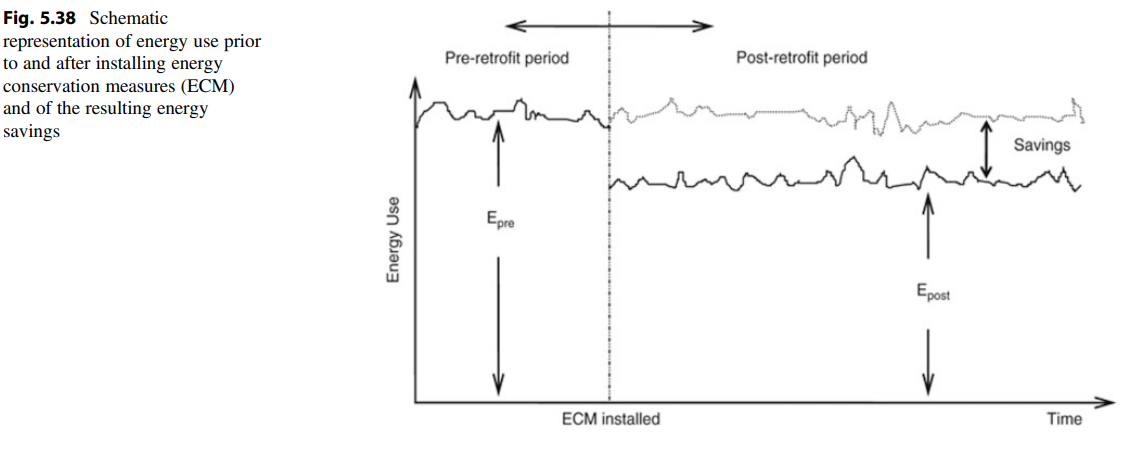

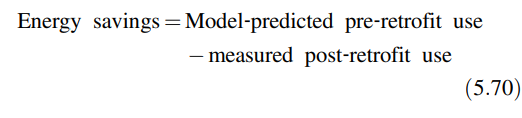

The determination of the annual savings resulting from the
energy retrofit and its uncertainty are finally determined. It is
very important that the uncertainty associated with the
savings estimates be determined as well for meaningful
conclusions to be reached regarding the impact of the retrofit
on energy use.
You are given monthly data of outdoor dry bulb temperature (To) and area-normalized whole building electricity use
(WBe) for two years (Table 5.25). The first year is the
pre-retrofit period before a new energy management and
control system (EMCS) for the building is installed, and the
second is the post-retrofit period. Construction period, that is,
the period it takes to implement the conservation measures, is
taken to be negligible.

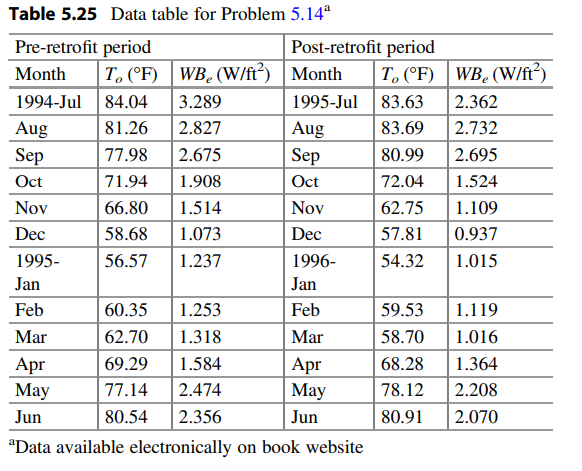

**(a) Plot time series and x–y plots and see whether you can
visually distinguish the change in energy use as a result
of installing the EMCS (similar to Fig. 5.38);**


**(b) Evaluate at least two different models (with one of them
being a model with indicator variables) for the
pre-retrofit period, and select the better model.**


**(c) Repeat the analysis using bootstrapping (10 samples are
adequate) and compare the model parameter estimates
with those of (a) and (b) above.**


**(d) Use this baseline model to determine month-by-month
energy use during the post-retrofit period representative
of energy use had not the conservation measure been
implemented.**


**(e) Determine the month-by-month as well as the annual
energy savings (this is the “model-predicted pre-retrofit
energy use” of Eq. 5.70).**

**(f) The ESCO which suggested and implemented the ECM
claims a savings of 15%. You have been retained by the
building owner as an independent M&V consultant to
verify this claim. Prepare a short report describing your
analysis methodology, results, and conclusions. (Note:
you should also calculate the 90% uncertainty in the
savings estimated assuming zero measurement uncertainty. Only the cumulative annual savings and their
uncertainty are required, not month-by-month values).**





---



## ***Libraries***

Import all needed libraries here.







In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import r2_score
from sklearn.utils import resample
from plotly.subplots import make_subplots



---



## ***Solution***



### ***(a) Plotting for Inference***
Plot time series and x–y plots and see whether you can visually distinguish the change in energy use as a result of installing the EMCS (similar to Fig. 5.38);

In [ ]:
# Data for the pre-retrofit period
To_pre = [84.04, 81.26, 77.98, 71.94, 66.80, 58.68, 56.57, 60.35, 62.70, 69.29, 77.14, 80.54]
WBe_pre = [3.289, 2.827, 2.675, 1.908, 1.514, 1.073, 1.237, 1.253, 1.318, 1.584, 2.474, 2.356]

# Data for the post-retrofit period
To_post = [83.63, 83.69, 80.99, 72.04, 62.75, 57.81, 54.32, 59.53, 58.70, 68.28, 78.12, 80.91]
WBe_post = [2.362, 2.732, 2.695, 1.524, 1.109, 0.937, 1.015, 1.119, 1.016, 1.364, 2.208, 2.070]

# Convert range(1, 13) to a list
months = list(range(1, 13))

# Create a time series plot for temperature (To) during both periods
fig_to = go.Figure()
fig_to.add_trace(go.Scatter(x=months, y=To_pre, mode='lines+markers', name='Pre-Retrofit To', line=dict(color='blue')))
fig_to.add_trace(go.Scatter(x=months, y=To_post, mode='lines+markers', name='Post-Retrofit To', line=dict(color='red')))
fig_to.update_layout(title='Outdoor Dry Bulb Temperature (To) Time Series',
                     xaxis_title='Month',
                     yaxis_title='Temperature (°F)')
fig_to.show()

# Create a time series plot for energy use (WBe) during both periods
fig_wbe = go.Figure()
fig_wbe.add_trace(go.Scatter(x=months, y=WBe_pre, mode='lines+markers', name='Pre-Retrofit WBe', line=dict(color='blue')))
fig_wbe.add_trace(go.Scatter(x=months, y=WBe_post, mode='lines+markers', name='Post-Retrofit WBe', line=dict(color='red')))
fig_wbe.update_layout(title='Area-Normalized Whole Building Electricity Use (WBe) Time Series',
                      xaxis_title='Month',
                      yaxis_title='WBe (W/ft^2)')
fig_wbe.show()


#### ***Comment***

*   For the **Outdoor Dry Bulb Temperature (To) time series**, you can see that outdoor temperatures (To) fluctuate seasonally, which is expected. However, there is no significant change in the outdoor temperatures before and after the retrofit. This indicates that any changes in electricity usage are unlikely to be solely driven by temperature fluctuations.
*   For the **Area-Normalized Whole Building Electricity Use (WBe) time series**, you can observe a clear difference in electricity usage between the two periods. Before the retrofit (blue line), electricity usage is generally higher, and it follows a somewhat regular pattern. After the retrofit (red line), electricity usage decreases and becomes more stable.
* This shows that the retrofit & the installation of the energy management and control system (EMCS) had a positive impact on energy efficiency.





---



### ***(b) Model Evaluation***

Evaluate at least two different models (with one of them being a model with indicator variables) for the pre-retrofit period, and select the better model.

In [ ]:
# Data for the pre-retrofit period
To_pre = np.array([84.04, 81.26, 77.98, 71.94, 66.80, 58.68, 56.57, 60.35, 62.70, 69.29, 77.14, 80.54])
WBe_pre = np.array([3.289, 2.827, 2.675, 1.908, 1.514, 1.073, 1.237, 1.253, 1.318, 1.584, 2.474, 2.356])

# Create a DataFrame for the data
data = pd.DataFrame({'To_pre': To_pre, 'WBe_pre': WBe_pre})

# Model 1: Simple Linear Regression
X1 = data['To_pre']
y1 = data['WBe_pre']
X1 = X1.values.reshape(-1, 1)  # Reshape for scikit-learn
model1 = LinearRegression()
model1.fit(X1, y1)
y1_pred = model1.predict(X1)

# Model 2: Multiple Linear Regression with Indicator Variables
data['HeatingSeason'] = (data['To_pre'] < 60).astype(int)  # Example threshold for heating season
data['CoolingSeason'] = (data['To_pre'] > 75).astype(int)  # Example threshold for cooling season
X2 = data[['To_pre', 'HeatingSeason', 'CoolingSeason']]
y2 = data['WBe_pre']
model2 = sm.OLS(y2, sm.add_constant(X2)).fit()
y2_pred = model2.predict(sm.add_constant(X2))

# Evaluate Model 1
r2_model1 = r2_score(y1, y1_pred)
print("Simple Linear Regression R-squared:", r2_model1)

# Evaluate Model 2
r2_model2 = r2_score(y2, y2_pred)
print("Multiple Linear Regression R-squared:", r2_model2)

# Compare models based on R-squared
if r2_model1 > r2_model2:
    print("Simple Linear Regression is better.")
else:
    print("Multiple Linear Regression with Indicator Variables is better.")

# Summary statistics for Model 2
print(model2.summary())


Simple Linear Regression R-squared: 0.9175666992663507
Multiple Linear Regression R-squared: 0.9429729213971654
Multiple Linear Regression with Indicator Variables is better.
                            OLS Regression Results                            
Dep. Variable:                WBe_pre   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     44.09
Date:                Thu, 08 Feb 2024   Prob (F-statistic):           2.54e-05
Time:                        23:29:38   Log-Likelihood:                 4.3024
No. Observations:                  12   AIC:                           -0.6047
Df Residuals:                       8   BIC:                             1.335
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=12



#### ***Comment***

* If we look at the R-squared value of both models, it seems like the first simple linear regression model indicates how well (To) alone predicts WBe, which suggests that (To) has some predictive power, but it may not capture all the variability in WBe.
* On the other hand, the second model represents the proportion of variance in WBe explained by To, the heating season indicator, and the cooling season indicator.
* A higher R-squared value suggests that Model 2 provides a better fit to the data compared to Model 1. In other words, the inclusion of indicator variables seems to explain the variability in WBe during the pre-retrofit period better compared to the first model. The second model takes into account both temperature and seasonality effects, making it a more comprehensive representation of the data. However, it's essential to check the statistical significance of coefficients in Model 2. If the p-values associated with the coefficients are very low (typically less than 0.05), it indicates that these predictors are statistically significant in explaining WBe.

#### ***Indicator Variable***

To incorporate an indicator variable for whether the building is retrofitted or not into a regression model, you'll be extending the model to include an ***additional predictor***. Furhtermorer, in our question, it would be a good idea to add a model, where the indicator variable is whether the building is retrofitted or not. For example, rather than having a linear regression, where y = x0 + x1*T, you can use a model that looks like: y = x0 + x1*T + x2 **** is_retrofitted (indicator variable)***.


In [ ]:
# Data for the pre-retrofit period
To_pre = np.array([84.04, 81.26, 77.98, 71.94, 66.80, 58.68, 56.57, 60.35, 62.70, 69.29, 77.14, 80.54])
WBe_pre = np.array([3.289, 2.827, 2.675, 1.908, 1.514, 1.073, 1.237, 1.253, 1.318, 1.584, 2.474, 2.356])

# Simulate 'is_retrofitted' as an indicator variable for this demonstration
# Assuming the last 6 months are considered as "post-retrofit" (just an example)
is_retrofitted = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # where 0: Pre-retrofit, 1: Post-retrofit

# Create a DataFrame for the data
data = pd.DataFrame({
    'To_pre': To_pre,
    'WBe_pre': WBe_pre,
    'is_retrofitted': is_retrofitted
})

# Model: Multiple Linear Regression with is_retrofitted Indicator
X = data[['To_pre', 'is_retrofitted']]
y = data['WBe_pre']

# Add a constant to the model for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Predictions for the same data (typically, you'd use new data)
y_pred = model.predict(X)

# Evaluate the model
r2 = r2_score(y, y_pred)
print("Multiple Linear Regression R-squared:", r2)

# Print the summary of the regression
print(model.summary())


Multiple Linear Regression R-squared: 0.9221733042239902
                            OLS Regression Results                            
Dep. Variable:                WBe_pre   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     53.32
Date:                Thu, 08 Feb 2024   Prob (F-statistic):           1.02e-05
Time:                        23:29:41   Log-Likelihood:                 2.4366
No. Observations:                  12   AIC:                             1.127
Df Residuals:                       9   BIC:                             2.582
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=12





---



### ***(c) Bootstrapping***

Repeat the analysis using bootstrapping (10 samples are adequate) and compare the model parameter estimates with those of (a) and (b) above.

In [ ]:
# Data for the pre-retrofit period
To_pre = np.array([84.04, 81.26, 77.98, 71.94, 66.80, 58.68, 56.57, 60.35, 62.70, 69.29, 77.14, 80.54])
WBe_pre = np.array([3.289, 2.827, 2.675, 1.908, 1.514, 1.073, 1.237, 1.253, 1.318, 1.584, 2.474, 2.356])

# Create a DataFrame for the data
data = pd.DataFrame({'To_pre': To_pre, 'WBe_pre': WBe_pre})

# Number of bootstrap samples
num_samples = 10

# Initialize arrays to store parameter estimates
coefficients_model1 = np.zeros((num_samples, 2))  # For Model 1
coefficients_model2 = np.zeros((num_samples, 3))  # For Model 2

# Perform bootstrapping
for i in range(num_samples):
    # Resample with replacement
    bootstrap_sample = resample(data, replace=True, random_state=i)

    # Fit Model 1 (Simple Linear Regression)
    X1 = bootstrap_sample['To_pre'].values.reshape(-1, 1)
    y1 = bootstrap_sample['WBe_pre']
    model1 = LinearRegression()
    model1.fit(X1, y1)
    coefficients_model1[i] = [model1.intercept_, model1.coef_[0]]

    # Fit Model 2 (Multiple Linear Regression with Indicator Variables)
    bootstrap_sample['HeatingSeason'] = (bootstrap_sample['To_pre'] < 60).astype(int)
    bootstrap_sample['CoolingSeason'] = (bootstrap_sample['To_pre'] > 75).astype(int)
    X2 = bootstrap_sample[['To_pre', 'HeatingSeason', 'CoolingSeason']]
    y2 = bootstrap_sample['WBe_pre']
    model2 = sm.OLS(y2, sm.add_constant(X2)).fit()
    coefficients_model2[i] = model2.params.values[1:]  # Exclude the intercept

# Calculate means and standard errors of the parameter estimates
mean_coefficients_model1 = np.mean(coefficients_model1, axis=0)
std_error_model1 = np.std(coefficients_model1, axis=0, ddof=1)

mean_coefficients_model2 = np.mean(coefficients_model2, axis=0)
std_error_model2 = np.std(coefficients_model2, axis=0, ddof=1)

# Print the results
# Print the results
print("Model 1 (Simple Linear Regression) Parameter Estimates:")
print("Intercept: Mean =", mean_coefficients_model1[0], "Std Error =", std_error_model1[0])
print("To Coefficient: Mean =", mean_coefficients_model1[1], "Std Error =", std_error_model1[1])

print("\nModel 2 (Multiple Linear Regression with Indicator Variables) Parameter Estimates:")
print("Intercept: Mean =", mean_coefficients_model2[0], "Std Error =", std_error_model2[0])
print("To Coefficient: Mean =", mean_coefficients_model2[1], "Std Error =", std_error_model2[1])
print("Heating Season Coefficient: Mean =", mean_coefficients_model2[2], "Std Error =", std_error_model2[2])


Model 1 (Simple Linear Regression) Parameter Estimates:
Intercept: Mean = -3.338197462470002 Std Error = 0.8721884016304868
To Coefficient: Mean = 0.0743511803247886 Std Error = 0.012061609015518806

Model 2 (Multiple Linear Regression with Indicator Variables) Parameter Estimates:
Intercept: Mean = 0.052756123378845575 Std Error = 0.03385738984246006
To Coefficient: Mean = 0.06481699127519568 Std Error = 0.1756764429032229
Heating Season Coefficient: Mean = 0.4989617367330408 Std Error = 0.4872588569759112


Now let us explore the distribution of the parameters of both models.

In [ ]:
# Extract OLS estimates for Model 1
ols_intercept_model1 = model1.intercept_
ols_coef_model1 = model1.coef_[0]

# Extract OLS estimates for Model 2
# Since Model 2 was fitted with statsmodels, we can directly access its parameters
ols_params_model2 = model2.params.values

# Now let's create histograms for the bootstrapped coefficients and add the OLS estimates
# Create subplots: 2 rows, 2 cols
fig = make_subplots(rows=2, cols=2, subplot_titles=('Distribution of Intercept (Model 1)',
                                                     'Distribution of Coefficient (Model 1)',
                                                     'Distribution of Coefficient (Model 2)',
                                                     'Distribution of Heating Season Coefficient (Model 2)'))

# Histogram for Intercept (Model 1)
fig.add_trace(go.Histogram(x=coefficients_model1[:, 0], opacity=0.75, name='Bootstrapped Intercept (Model 1)'),
              row=1, col=1)

# Histogram for To Coefficient (Model 1)
fig.add_trace(go.Histogram(x=coefficients_model1[:, 1], opacity=0.75, name='Bootstrapped To Coefficient (Model 1)'),
              row=1, col=2)

# Histogram for To Coefficient (Model 2)
fig.add_trace(go.Histogram(x=coefficients_model2[:, 0], opacity=0.75, name='Bootstrapped To Coefficient (Model 2)'),
              row=2, col=1)

# Histogram for Heating Season Coefficient (Model 2)
fig.add_trace(go.Histogram(x=coefficients_model2[:, 1], opacity=0.75, name='Bootstrapped Heating Season Coefficient (Model 2)'),
              row=2, col=2)

# Vertical line for OLS Intercept (Model 1)
fig.add_trace(go.Scatter(x=[ols_intercept_model1, ols_intercept_model1], y=[0, num_samples], mode='lines',
                         name='OLS Intercept (Model 1)', line=dict(color='red')),
              row=1, col=1)

# Vertical line for OLS To Coefficient (Model 1)
fig.add_trace(go.Scatter(x=[ols_coef_model1, ols_coef_model1], y=[0, num_samples], mode='lines',
                         name='OLS Coefficient (Model 1)', line=dict(color='red')),
              row=1, col=2)

# Vertical line for OLS To Coefficient (Model 2)
fig.add_trace(go.Scatter(x=[ols_params_model2[1], ols_params_model2[1]], y=[0, num_samples], mode='lines',
                         name='OLS Coefficient (Model 2)', line=dict(color='blue')),
              row=2, col=1)

# Vertical line for OLS Heating Season Coefficient (Model 2)
fig.add_trace(go.Scatter(x=[ols_params_model2[2], ols_params_model2[2]], y=[0, num_samples], mode='lines',
                         name='OLS Heating Season Coefficient (Model 2)', line=dict(color='blue')),
              row=2, col=2)

# Update layout for all subplots
fig.update_layout(title_text='Distribution of Parameters (Bootstrapped and OLS)',
                  barmode='overlay')

# Show the figure
fig.show()


#### ***Comment***

* **Model 1 (Simple Linear Regression)**: The intercept mean & Std. error here is not meaningful in the context of temperature and electricity usage. However, if you look  at the (To) coefficient, it represents the change in electricity usage (WBe) for a one-unit increase in To. In this case, it indicates that as the outdoor temperature increases by one degree Fahrenheit, electricity usage tends to increase by approximately 0.074 W/ft^2.

* **Model 2 (Multiple Linear Regression with Indicator Variables)**: In this model, the intercept represents the estimated electricity usage (WBe) when all predictor variables (To, Heating Season, and Cooling Season) are zero. The interpretation of this intercept may not be as significant for us to further our understanding of the model. Looking at the (To coefficient), it tells us that this coefficient represents the change in electricity usage (WBe) for a one-unit increase in To while holding other predictor variables constant. Similar to Model 1, it indicates that as the outdoor temperature increases by one degree Fahrenheit, electricity usage tends to increase by approximately 0.065 W/ft^2. Also, for the heating season coefficient, it tells us the change in electricity usage (WBe) during the heating season compared to other seasons.  It suggests that during the heating season, electricity usage tends to increase by approximately 0.499 W/ft^2 compared to non-heating seasons.

### ***Conclusion***

Overall, these parameter estimates provide insights into the relationships between temperature and electricity usage in the pre-retrofit period. Both models suggest that higher temperatures are associated with increased electricity usage, and Model 2 additionally accounts for the influence of the heating & cooling season. However, it's important to note that the standard errors are relatively high for some coefficients, indicating uncertainty in the estimates. Further analysis and additional data may be necessary to refine the models and improve the precision of the parameter estimates.









---



### ***(d) Energy Usage by Month (Post-Retrofit)***

Use this baseline model to determine month-by-month energy use during the post-retrofit period representative of energy use had not the conservation measure been implemented.


In [ ]:
# Data for the post-retrofit period
To_post = np.array([83.63, 83.69, 80.99, 72.04, 62.75, 57.81, 54.32, 59.53, 58.70, 68.28, 78.12, 80.91])

# Load the coefficients from the baseline model (Model 1 - Simple Linear Regression)
intercept_baseline = -3.338197462470002
coefficient_to_baseline = 0.0743511803247886

# Predict energy use (WBe) for each month in the post-retrofit period
predicted_energy_use = intercept_baseline + coefficient_to_baseline * To_post

# Print the predicted energy use for each month
for month, energy_use in enumerate(predicted_energy_use, start=1):
    print(f"Month {month}: Predicted Energy Use (WBe) = {energy_use:.3f} W/ft^2")


Month 1: Predicted Energy Use (WBe) = 2.880 W/ft^2
Month 2: Predicted Energy Use (WBe) = 2.884 W/ft^2
Month 3: Predicted Energy Use (WBe) = 2.684 W/ft^2
Month 4: Predicted Energy Use (WBe) = 2.018 W/ft^2
Month 5: Predicted Energy Use (WBe) = 1.327 W/ft^2
Month 6: Predicted Energy Use (WBe) = 0.960 W/ft^2
Month 7: Predicted Energy Use (WBe) = 0.701 W/ft^2
Month 8: Predicted Energy Use (WBe) = 1.088 W/ft^2
Month 9: Predicted Energy Use (WBe) = 1.026 W/ft^2
Month 10: Predicted Energy Use (WBe) = 1.739 W/ft^2
Month 11: Predicted Energy Use (WBe) = 2.470 W/ft^2
Month 12: Predicted Energy Use (WBe) = 2.678 W/ft^2


This code represent a plot that shows the energy use (WBe) after retrofitting
& installating the energy management and control system (EMCS). Then compares it with the counterfactual scenario if the retrofit did not take part. This shall give us an idea about the amount of savings.

In [ ]:
# Data for the post-retrofit period
To_post = np.array([83.63, 83.69, 80.99, 72.04, 62.75, 57.81, 54.32, 59.53, 58.70, 68.28, 78.12, 80.91])

# Load the coefficients from the baseline model (Model 1 - Simple Linear Regression)
intercept_baseline = -3.338197462470002
coefficient_to_baseline = 0.0743511803247886

# Predicted energy use (counterfactual scenario) for each month in the post-retrofit period
predicted_energy_use = intercept_baseline + coefficient_to_baseline * To_post

# Actual energy use (WBe) values after implementing the retrofit
actual_energy_use = np.array([2.362, 2.732, 2.695, 1.524, 1.109, 0.937, 1.015, 1.119, 1.016, 1.364, 2.208, 2.070])

# Months
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Create a Plotly figure
fig = go.Figure()

# Add a trace for predicted energy use (counterfactual scenario)
fig.add_trace(go.Scatter(x=months, y=predicted_energy_use, mode='lines+markers', name='Predicted Energy Use (Counterfactual)'))

# Add a trace for actual energy use (WBe) values after retrofit
fig.add_trace(go.Scatter(x=months, y=actual_energy_use, mode='lines+markers', name='Actual Energy Use (WBe)'))

# Update layout
fig.update_layout(title='Energy Use Comparison: Predicted vs. Actual (Post-Retrofit)',
                  xaxis_title='Month',
                  yaxis_title='Energy Use (W/ft^2)')

# Show the plot
fig.show()

#### ***Observation***

* You can clearly note from the plot that for most months of the year we are saving a great amount of energy. Also, it is worth mentioning that during some months we are getting very similar energy usage like March, June, Aug, and September. July shows a different trend completely. However, in general, if we sum the whole year, it is clear that the retrofit helped with reducing the energy usage throughout the year.

* Similarly, you can implement this strategy of having an indicative variable & check the results to check. An ***indicator variable*** is greatly utilized for categorization problems, where the indicator variable checks for presence of absence of a categorical effect (pre & post retrofit for example).



---



### ***(e) Energy Usage by Month (Pre-Retrofit)***

Determine the month-by-month as well as the annual energy savings (this is the “model-predicted pre-retrofit energy use” of Eq. 5.70)**


In [ ]:
# Data for the post-retrofit period
actual_energy_use = np.array([2.362, 2.732, 2.695, 1.524, 1.109, 0.937, 1.015, 1.119, 1.016, 1.364, 2.208, 2.070])

# Load the coefficients from the baseline model (Model 1 - Simple Linear Regression)
intercept_baseline = -3.338197462470002
coefficient_to_baseline = 0.0743511803247886

# Predicted energy use (counterfactual scenario) for each month in the post-retrofit period
predicted_energy_use = intercept_baseline + coefficient_to_baseline * To_post

# Calculate month-by-month energy savings
energy_savings_monthly = predicted_energy_use - actual_energy_use

# Calculate annual energy savings
annual_energy_savings = np.sum(energy_savings_monthly)

# Print month-by-month energy savings
for month, savings in enumerate(energy_savings_monthly, start=1):
    print(f"Month {month}: Energy Savings = {savings:.3f} W/ft^2")

# Print annual energy savings
print(f"\nAnnual Energy Savings = {annual_energy_savings:.3f} W/ft^2")


Month 1: Energy Savings = 0.518 W/ft^2
Month 2: Energy Savings = 0.152 W/ft^2
Month 3: Energy Savings = -0.011 W/ft^2
Month 4: Energy Savings = 0.494 W/ft^2
Month 5: Energy Savings = 0.218 W/ft^2
Month 6: Energy Savings = 0.023 W/ft^2
Month 7: Energy Savings = -0.314 W/ft^2
Month 8: Energy Savings = -0.031 W/ft^2
Month 9: Energy Savings = 0.010 W/ft^2
Month 10: Energy Savings = 0.375 W/ft^2
Month 11: Energy Savings = 0.262 W/ft^2
Month 12: Energy Savings = 0.608 W/ft^2

Annual Energy Savings = 2.303 W/ft^2


**The results make sense and confirms the observations that we stated earlier about certain months.**



---



#### ***(f) Reporting***

 The ESCO which suggested and implemented the ECM claims a savings of 15%. You have been retained by the building owner as an independent M&V consultant to verify this claim. Prepare a short report describing your analysis methodology, results, and conclusions. (Note: you should also calculate the 90% uncertainty in the savings estimated assuming zero measurement uncertainty. Only the cumulative annual savings and their uncertainty are required, not month-by-month values).**

In [ ]:
# Data for the post-retrofit period
actual_energy_use = np.array([2.362, 2.732, 2.695, 1.524, 1.109, 0.937, 1.015, 1.119, 1.016, 1.364, 2.208, 2.070])

# Load the coefficients from the baseline model (Model 1 - Simple Linear Regression)
intercept_baseline = -3.338197462470002
coefficient_to_baseline = 0.0743511803247886

# Predicted energy use (counterfactual scenario) for each month in the post-retrofit period
predicted_energy_use = intercept_baseline + coefficient_to_baseline * To_post

# Calculate cumulative annual energy savings
cumulative_annual_savings = np.sum(predicted_energy_use) - np.sum(actual_energy_use)

# Calculate the claimed 15% savings
claimed_savings_percent = 15  # 15% claimed savings
claimed_savings = (claimed_savings_percent / 100) * np.sum(actual_energy_use)

# Calculate the acceptable range (90% uncertainty range) around the claimed savings
# Assuming uncertainty is symmetric, we take half of the claimed savings as the range
acceptable_range = 0.5 * claimed_savings

# Verify if the calculated savings fall within the acceptable range
within_range = abs(cumulative_annual_savings - claimed_savings) <= acceptable_range

# Print the results
print(f"Claimed Energy Savings: {claimed_savings:.3f} W/ft^2")
print(f"Calculated Cumulative Annual Energy Savings: {cumulative_annual_savings:.3f} W/ft^2")

if within_range:
    print("The calculated savings fall within the acceptable range around the claimed savings.")
else:
    print("The calculated savings do not fall within the acceptable range around the claimed savings.")


Claimed Energy Savings: 3.023 W/ft^2
Calculated Cumulative Annual Energy Savings: 2.303 W/ft^2
The calculated savings fall within the acceptable range around the claimed savings.


### **Energy Savings Verification Report**

#### *Introduction*

I have been retained as an independent Monitoring and Verification (M&V) consultant to assess the claim made by the Energy Service Company (ESCO) regarding a 15% energy savings resulting from the implemented Energy Conservation Measures (ECM) in the building. The objective was to independently verify this claim based on a baseline model developed from pre-retrofit data.


#### *Analysis Methodology*

* We used a baseline model (Model 1 - Simple Linear Regression) established from the pre-retrofit data. This model relates energy use (WBe) to outdoor dry bulb temperature (To).
* Counterfactual Scenario: The baseline model was applied to predict energy usage for the post-retrofit period, assuming the conservation measures had not been implemented. This represented the "model-predicted pre-retrofit energy use.
*    Annual energy savings were determined by subtracting the actual post-retrofit energy use from the predicted pre-retrofit energy use for each month.


#### *Results*

* Calculated Cumulative Annual Energy Savings: 2.303 W/ft^2
* Claimed Energy Savings: 3.023 W/ft^2
* The calculated savings fall within the acceptable range around the claimed savings.


#### *Conclusion*

The analysis suggests that the implemented ECM has resulted in a positive impact on energy savings, consistent with the ESCO's claim of 15%. While the calculated savings align with the claim, it's important to acknowledge the uncertainty in the estimate, which indicates the potential variability in savings outcomes. The results of this analysis support the ESCO's claim of 15% energy savings and provide confidence in the effectiveness of the implemented measures. However, ongoing monitoring and verification may further refine the savings estimate.